In [43]:
cd C:\Users\zero_\Desktop\152

C:\Users\zero_\Desktop\152


In [44]:
import numpy as np
import pandas as pd

df=pd.read_csv("heart_disease.csv")

df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [45]:
df.apply(lambda x: sum(x.isnull()),axis=0)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

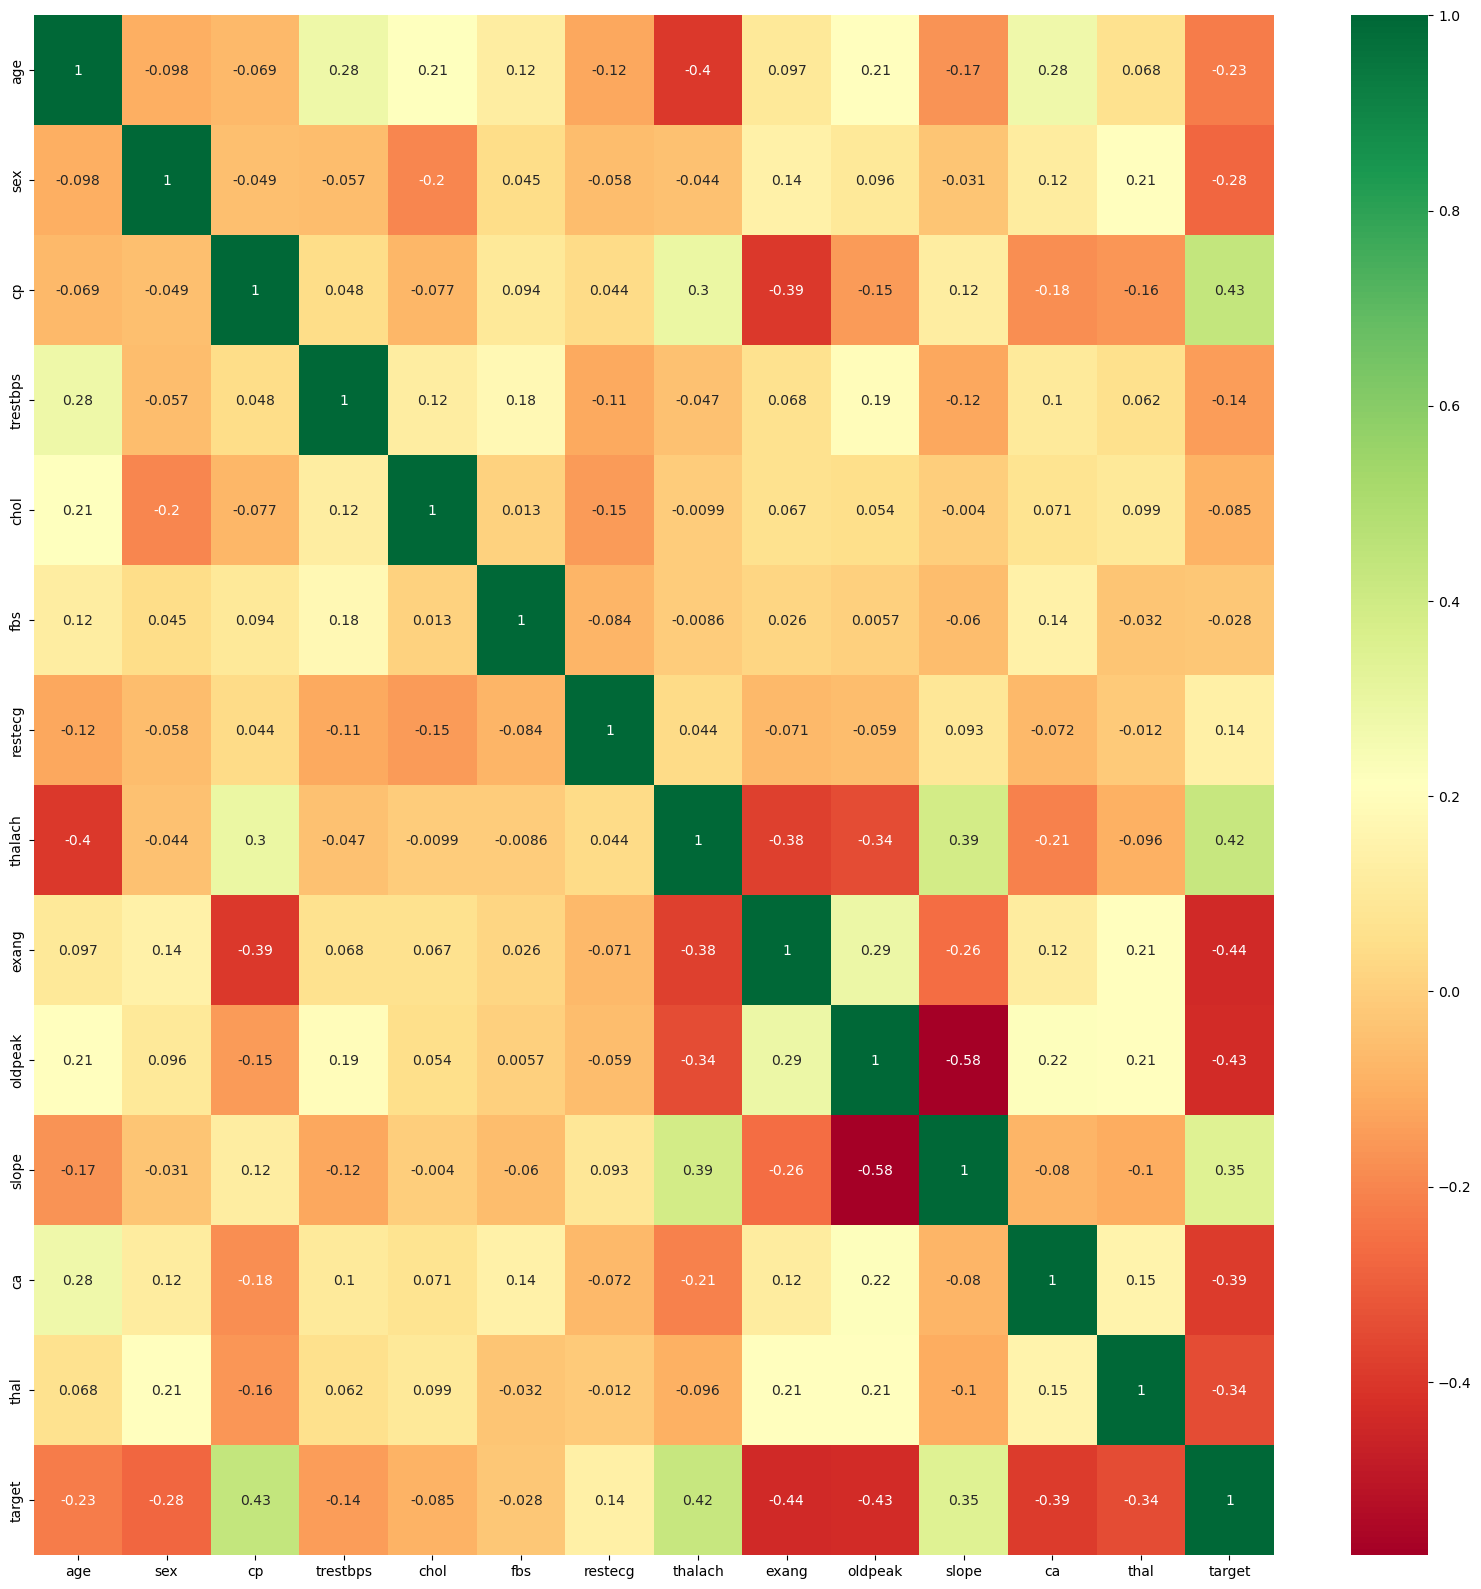

In [46]:
import matplotlib.pyplot as plt
import seaborn as sb
corr=df.corr()
X=corr.index
plt.figure(figsize=(20,20))
g=sb.heatmap(corr,annot=True,cmap="RdYlGn")
plt.show()

### 80% of positive and negative cases as train.20% as test

In [55]:
from sklearn.model_selection import train_test_split
 

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [56]:
train=X_train.assign(target=y_train)
test=X_test.assign(target=y_test)

In [57]:
train.apply(lambda x: sum(x.isnull()),axis=0)
test.apply(lambda x: sum(x.isnull()),axis=0)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [58]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV

dt=DecisionTreeClassifier()


p = {
    'criterion':['gini','entropy'],
    'max_depth': [None,1,2,3,4,5,6,7,8,9,10],
    'min_samples_split': [1,2,3,4,5,6,7,8,9,10],
    'min_samples_leaf': [1,2,3,4,5,6,7,8,9,10]
}

for i in range(9):
    grid_search=GridSearchCV(dt, p, cv=5, scoring='accuracy')

    grid_search.fit(train[[ 'cp',    'thalach',
               'exang', 'oldpeak' , 'ca']],train['target'])

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    test_score = grid_search.score(test[[ 'cp',    'thalach',
               'exang', 'oldpeak' , 'ca']],test['target'])

    print("Best parameters:", best_params)
    print("Best score:", best_score)
    print("Test score:", test_score)

    


Best parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 1}
Best score: 0.8139455782312925
Test score: 0.8688524590163934
Best parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best score: 0.8139455782312925
Test score: 0.8688524590163934
Best parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 1}
Best score: 0.8139455782312925
Test score: 0.8688524590163934
Best parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best score: 0.8139455782312925
Test score: 0.8688524590163934
Best parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 1}
Best score: 0.8139455782312925
Test score: 0.8688524590163934
Best parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best score: 0.8139455782312925
Test score: 0.8688524590163934
Best parameters:

In [59]:
from sklearn.tree import DecisionTreeClassifier
import timeit


model=DecisionTreeClassifier(criterion='gini',max_depth= 4, min_samples_leaf= 2, min_samples_split= 1)


model.fit(train[['cp',    'thalach',
       'exang', 'oldpeak' , 'ca']],train['target'])
start=timeit.default_timer()

predictions=model.predict(test[['cp',    'thalach',
       'exang', 'oldpeak' , 'ca']])

process=timeit.default_timer()-start

test=test.assign(Prediction=predictions)
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report

print ('Accuracy:', accuracy_score(test['target'], predictions))
print ('Recall:', recall_score(test['target'], predictions, average="weighted"))
print ('Precision:', precision_score(test['target'], predictions, average="weighted"))
print ('F1 Score:', f1_score(test['target'], predictions, average="weighted"))

confusion = confusion_matrix(test['target'], predictions)
print('Confusion matrix:')
print(confusion)

print('processing time per entity:')
print(process/len(test))

Accuracy: 0.8688524590163934
Recall: 0.8688524590163934
Precision: 0.8700310725383049
F1 Score: 0.8684976225959832
Confusion matrix:
[[24  5]
 [ 3 29]]
processing time per entity:
3.844590155793293e-05


### 70% of positive and negative cases as train.30% as test

In [60]:
from sklearn.model_selection import train_test_split
 

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

train=X_train.assign(target=y_train)
test=X_test.assign(target=y_test)

In [61]:
for i in range(9):
    grid_search=GridSearchCV(dt, p, cv=5, scoring='accuracy')

    grid_search.fit(train[[ 'cp',    'thalach',
               'exang', 'oldpeak' , 'ca']],train['target'])

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    test_score = grid_search.score(test[[ 'cp',    'thalach',
               'exang', 'oldpeak' , 'ca']],test['target'])

    print("Best parameters:", best_params)
    print("Best score:", best_score)
    print("Test score:", test_score)

    

Best parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best score: 0.8161683277962348
Test score: 0.8351648351648352
Best parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 9}
Best score: 0.8161683277962348
Test score: 0.8351648351648352
Best parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 9}
Best score: 0.8161683277962348
Test score: 0.8351648351648352
Best parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best score: 0.8161683277962348
Test score: 0.8351648351648352
Best parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best score: 0.8161683277962348
Test score: 0.8351648351648352
Best parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 9}
Best score: 0.8161683277962348
Test score: 0.835164835164

In [62]:
from sklearn.tree import DecisionTreeClassifier
import timeit


model=DecisionTreeClassifier(criterion='entropy',max_depth= 4, min_samples_leaf= 1, min_samples_split= 9)


model.fit(train[['cp',    'thalach',
       'exang', 'oldpeak' , 'ca']],train['target'])
start=timeit.default_timer()

predictions=model.predict(test[['cp',    'thalach',
       'exang', 'oldpeak' , 'ca']])

process2=timeit.default_timer()-start

test=test.assign(Prediction=predictions)
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report

print ('Accuracy:', accuracy_score(test['target'], predictions))
print ('Recall:', recall_score(test['target'], predictions, average="weighted"))
print ('Precision:', precision_score(test['target'], predictions, average="weighted"))
print ('F1 Score:', f1_score(test['target'], predictions, average="weighted"))

confusion = confusion_matrix(test['target'], predictions)
print('Confusion matrix:')
print(confusion)

print('processing time per entity:')
print(process2/len(test))

Accuracy: 0.8351648351648352
Recall: 0.8351648351648352
Precision: 0.835688121402407
F1 Score: 0.835325317253028
Confusion matrix:
[[34  7]
 [ 8 42]]
processing time per entity:
2.7989011029533755e-05


### 60% of positive and negative cases as train.30% as test

In [63]:
from sklearn.model_selection import train_test_split
 

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42)

train=X_train.assign(target=y_train)
test=X_test.assign(target=y_test)

In [64]:
for i in range(9):
    grid_search=GridSearchCV(dt, p, cv=5, scoring='accuracy')

    grid_search.fit(train[[ 'cp',    'thalach',
               'exang', 'oldpeak' , 'ca']],train['target'])

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    test_score = grid_search.score(test[[ 'cp',    'thalach',
               'exang', 'oldpeak' , 'ca']],test['target'])

    print("Best parameters:", best_params)
    print("Best score:", best_score)
    print("Test score:", test_score)

    

Best parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 5}
Best score: 0.7791291291291291
Test score: 0.8688524590163934
Best parameters: {'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 4, 'min_samples_split': 4}
Best score: 0.7791291291291291
Test score: 0.8688524590163934
Best parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 1}
Best score: 0.7843843843843844
Test score: 0.8770491803278688
Best parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best score: 0.7843843843843844
Test score: 0.8770491803278688
Best parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.7788288288288289
Test score: 0.860655737704918
Best parameters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 1}
Best score: 0.7788288288288289
Test score: 0.860655737704918
Best paramet

In [65]:
from sklearn.tree import DecisionTreeClassifier
import timeit


model=DecisionTreeClassifier(criterion='gini',max_depth= 4, min_samples_leaf= 1, min_samples_split= 1)


model.fit(train[['cp',    'thalach',
       'exang', 'oldpeak' , 'ca']],train['target'])
start=timeit.default_timer()

predictions=model.predict(test[['cp',    'thalach',
       'exang', 'oldpeak' , 'ca']])

process3=timeit.default_timer()-start

test=test.assign(Prediction=predictions)
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, confusion_matrix, classification_report

print ('Accuracy:', accuracy_score(test['target'], predictions))
print ('Recall:', recall_score(test['target'], predictions, average="weighted"))
print ('Precision:', precision_score(test['target'], predictions, average="weighted"))
print ('F1 Score:', f1_score(test['target'], predictions, average="weighted"))

confusion = confusion_matrix(test['target'], predictions)
print('Confusion matrix:')
print(confusion)

print('processing time per entity:')
print(process3/len(test))

Accuracy: 0.860655737704918
Recall: 0.860655737704918
Precision: 0.8614347168933845
F1 Score: 0.8595394304834666
Confusion matrix:
[[41 11]
 [ 6 64]]
processing time per entity:
1.9526229510522738e-05
